<div class="alert alert-block alert-info">
    <h2><strong><center>Import Library</center><strong></h2>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
plt.rcParams["font.sans-serif"] = ['SimHei']

<div class="alert alert-block alert-info">
    <h2><strong><center>Input Data</center><strong></h2>

In [4]:
DP_safe_filename = "../../db/dp_safe_result.txt"
DP_ref_filename = "../../db/dp_ref_result.txt"
Leader_filename = "../result/leader_result.txt"

In [5]:
dp_safe_df = pd.DataFrame(columns = ["space", "speed", "limit"])
for line in open(DP_safe_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    dp_safe_df = dp_safe_df.append({"space": float(strs[0]), "speed": float(strs[1]), "limit": float(strs[2])}, ignore_index = True)
dp_ref_df = pd.DataFrame(columns = ["space", "speed", "limit"])
for line in open(DP_ref_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    dp_ref_df = dp_ref_df.append({"space": float(strs[0]), "speed": float(strs[1]), "limit": float(strs[2])}, ignore_index = True)

In [6]:
leader_df = pd.DataFrame(columns = ["space", "speed", "force"])
for line in open(Leader_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    leader_df = leader_df.append({"space": float(strs[0]), "speed": float(strs[1]), "force": float(strs[2])}, ignore_index = True)

<div class="alert alert-block alert-info">
    <h2><strong><center>Visualization</center><strong></h2>

## Leader Control

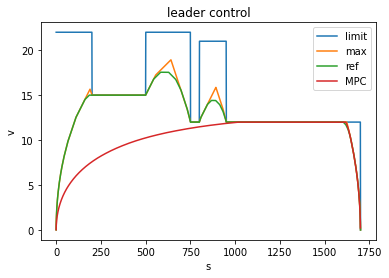

In [10]:
plt.plot(dp_safe_df["space"], dp_safe_df["limit"])
plt.plot(dp_safe_df["space"], dp_safe_df["speed"])
plt.plot(dp_ref_df["space"], dp_ref_df["speed"])
plt.plot(leader_df["space"], leader_df["speed"])
plt.legend(["limit", "max", "ref", "MPC"])
plt.xlabel("s")
plt.ylabel("v")
plt.title("leader control")
plt.show()

In [ ]:
def cost(row_data):
    Kv = 1
    Ku = 0.08
    v_max = 30
    u_max = 160800 * 0.92
    return Kv * (1 - row_data["speed"] / v_max) * (1 - row_data["speed"] / v_max) + Ku * row_data["function"] / u_max * row_data["function"] / u_max

leader_df.apply(cost, axis = 0)